# Recalibration after SA

In [13]:
import pysd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize

In [14]:
# load the Vensim model into Python
model = pysd.read_vensim(r'SFD_Group_for_calibration_after_SA.mdl')

In [15]:
# run the model with default parameter values
model_output = model.run()
model_output.head(5)

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Divorce rate,Societal factor,Scaled divorce,Marriage rate,Divorce,Population,Delay for recovery,Recovery,Divorced,Unmarried,K,Marriage,Married,Recovery rate,Education,W soc
1992.0000,2018,1992,0.0625,0.0625,0.794754,0.588623,486.028880,0.123413,9.004171e+07,185260000.0,3,120680.000000,3.017000e+07,4.179500e+07,2.2,5.158054e+06,1.132950e+08,0.004,0.9,0.338
1992.0625,2018,1992,0.0625,0.0625,0.800183,0.604682,466.433904,0.118595,8.641155e+07,185260000.0,3,120680.000000,3.579006e+07,4.148016e+07,2.2,4.919351e+06,1.079898e+08,0.004,0.9,0.338
1992.1250,2018,1992,0.0625,0.0625,0.805321,0.619885,447.288819,0.114035,8.286473e+07,185260000.0,3,121148.338700,4.118324e+07,4.118025e+07,2.2,4.695971e+06,1.028965e+08,0.004,0.9,0.338
1992.1875,2018,1992,0.0625,0.0625,0.810175,0.634245,428.619308,0.109726,7.940601e+07,185260000.0,3,122056.351932,4.635472e+07,4.089432e+07,2.2,4.487191e+06,9.801096e+07,0.004,0.9,0.338
1992.2500,2018,1992,0.0625,0.0625,0.814751,0.647785,410.447708,0.105665,7.603954e+07,185260000.0,3,123376.404359,5.130996e+07,4.062150e+07,2.2,4.292253e+06,9.332854e+07,0.004,0.9,0.338


In [16]:
# list all stocks, variables and parameters of the model
list(model_output)

['FINAL TIME',
 'INITIAL TIME',
 'SAVEPER',
 'TIME STEP',
 'Divorce rate',
 'Societal factor',
 'Scaled divorce',
 'Marriage rate',
 'Divorce',
 'Population',
 'Delay for recovery',
 'Recovery',
 'Divorced',
 'Unmarried',
 'K',
 'Marriage',
 'Married',
 'Recovery rate',
 'Education',
 'W soc']

<Axes: xlabel='Year'>

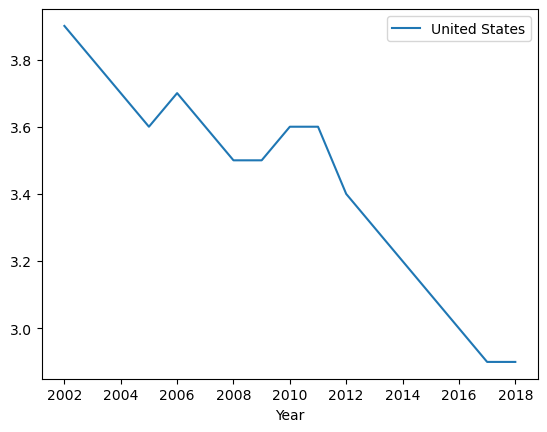

In [17]:
data = pd.read_csv(r'C:\Users\dimcp\Documents\MSD-Group-1\US_2002.csv', sep=',', index_col='Year')
data.plot()

In [38]:
import scipy.optimize as opt
import warnings
warnings.filterwarnings("ignore")
# Your error function remains the same
def error(param_list):
    #unpack the parameter list
    parameter1, parameter2, parameter3= param_list
    #run the model with the new parameters, returning the info we're interested in
    result = model.run(params={'K':parameter1,
                               'W soc':parameter2,
                               'Recovery Rate': parameter3
                                },
                       return_columns=['Divorce', 'Population'],
                       return_timestamps=list(data.index.values))#return_timestamps=np.arange(2002, 2018, 1))
    #return the sum of the squared errors
    return sum((result['Divorce']/result['Population'] *1000- data['United States'])**2)


# Initial guesses and bounds remain the same
parameter1_guess = 0
parameter2_guess = 0.5
parameter3_guess = 0.8


parameter1_bounds = (-4, 4)
parameter2_bounds = (0, 1)
parameter3_bounds = (0, 1)

# Perform the optimization using SLSQP method
res = opt.minimize(error, [parameter1_guess,
                           parameter2_guess,
                           parameter3_guess],
                   method='SLSQP',
                   bounds=[parameter1_bounds,
                           parameter2_bounds,
                           parameter3_bounds])

# Print the result
print(res)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.21870380663925934
       x: [ 3.109e+00  5.892e-01  2.021e-03]
     nit: 8
     jac: [ 1.336e-02  2.484e-03 -1.806e+00]
    nfev: 34
    njev: 8


message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.21870380663925934
       x: [ 3.109e+00  5.892e-01  2.021e-03]
     nit: 8
     jac: [ 1.336e-02  2.484e-03 -1.806e+00]
    nfev: 34
    njev: 8

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.21870380663925934
       x: [ 3.109e+00  5.892e-01  2.021e-03]
     nit: 8
     jac: [ 1.336e-02  2.484e-03 -1.806e+00]
    nfev: 34
    njev: 8


Text(2, 9000, '')

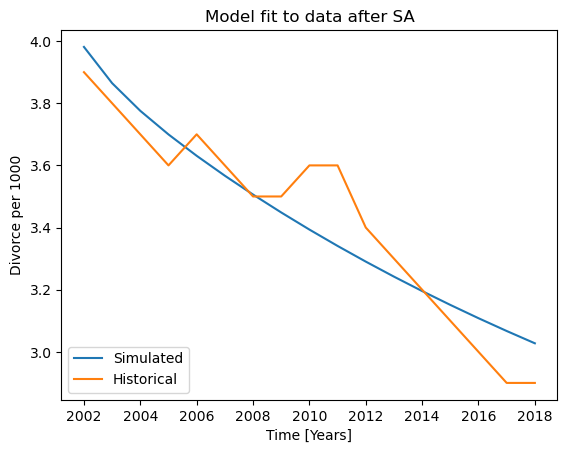

In [40]:
parameter1, parameter2, parameter3 = res.x
print(res)
result = model.run(params={'K':parameter1,
                           'W soc':parameter2,
                           'Recovery rate':parameter3},
                   return_columns=['Divorce','Population','Scaled divorce'],
                   return_timestamps=list(data.index.values))

# print(result)

plt.plot(result.index, result['Divorce']/result['Population'] *1000, label='Simulated')
plt.plot(data.index, data['United States'], label='Historical')
plt.xlabel('Time [Years]')
plt.ylabel('Divorce per 1000')
plt.title('Model fit to data after SA')
plt.legend(loc='lower left')
plt.text(2,9000, '', color='r', fontsize=12)